The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. There are 400 rows

#### Data Description:
We use the following representation to collect the dataset

age - age

bp - blood pressure

sg - specific gravity

al - albumin

su - sugar

rbc - red blood cells

pc - pus cell

pcc - pus cell clumps

ba - bacteria

bgr - blood glucose random

bu - blood urea

sc - serum creatinine

sod - sodium

pot - potassium

hemo - hemoglobin

pcv - packed cell volume

wc - white blood cell count

rc - red blood cell count

htn - hypertension

dm - diabetes mellitus

cad - coronary artery disease

appet - appetite

pe - pedal edema

ane - anemia

class - class

Dataset Link : https://www.kaggle.com/mansoordaku/ckdisease

### Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical) age in years

2.Blood Pressure(numerical) bp in mm/Hg

3.Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal) al - (0,1,2,3,4,5)

5.Sugar(nominal) su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal) rbc - (normal,abnormal)

7.Pus Cell (nominal) pc - (normal,abnormal)

8.Pus Cell clumps(nominal) pcc - (present,notpresent)

9.Bacteria(nominal) ba - (present,notpresent)

10.Blood Glucose Random(numerical) bgr in mgs/dl

11.Blood Urea(numerical) bu in mgs/dl

12.Serum Creatinine(numerical) sc in mgs/dl

13.Sodium(numerical) sod in mEq/L

14.Potassium(numerical) pot in mEq/L

15.Hemoglobin(numerical) hemo in gms

16.Packed Cell Volume(numerical)

17.White Blood Cell Count(numerical) wc in cells/cumm

18.Red Blood Cell Count(numerical) rc in millions/cmm

19.Hypertension(nominal) htn - (yes,no)

20.Diabetes Mellitus(nominal) dm - (yes,no)

21.Coronary Artery Disease(nominal) cad - (yes,no)

22.Appetite(nominal) appet - (good,poor)

23.Pedal Edema(nominal) pe - (yes,no)

24.Anemia(nominal) ane - (yes,no)

25.Class (nominal) class - (ckd,notckd)



In [1]:
!pip install modin


     |████████████████████████████████| 970 kB 14.8 MB/s            
     |████████████████████████████████| 962 kB 46.4 MB/s            
     |████████████████████████████████| 957 kB 60.6 MB/s            
     |████████████████████████████████| 956 kB 64.8 MB/s            
     |████████████████████████████████| 956 kB 67.8 MB/s            
     |████████████████████████████████| 761 kB 50.7 MB/s            
     |████████████████████████████████| 11.3 MB 63.9 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.4.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bs

In [2]:
!pip install scikit-learn-intelex


     |████████████████████████████████| 115 kB 13.3 MB/s            
     |████████████████████████████████| 13.7 MB 56.3 MB/s            
     |████████████████████████████████| 69.2 MB 75 kB/s              
     |████████████████████████████████| 4.0 MB 69.2 MB/s            


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# Importing libraries
import modin.pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import time

In [5]:
# Reading data
df = pd.read_csv("../input/ckdisease/kidney_disease.csv")
%time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [6]:
df.head()
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [7]:
df.shape

(400, 26)

In [8]:
df.info()
%time

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  --------------  --------------  -----  
 0   id              400 non-null    int64
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object
 7   pc              335 non-null    object
 8   pcc             396 non-null    object
 9   ba              396 non-null    object
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object
 17  wc              295 non-null    objec

In [9]:
df.isnull().sum()
%time

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


In [10]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [11]:
df.describe()
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


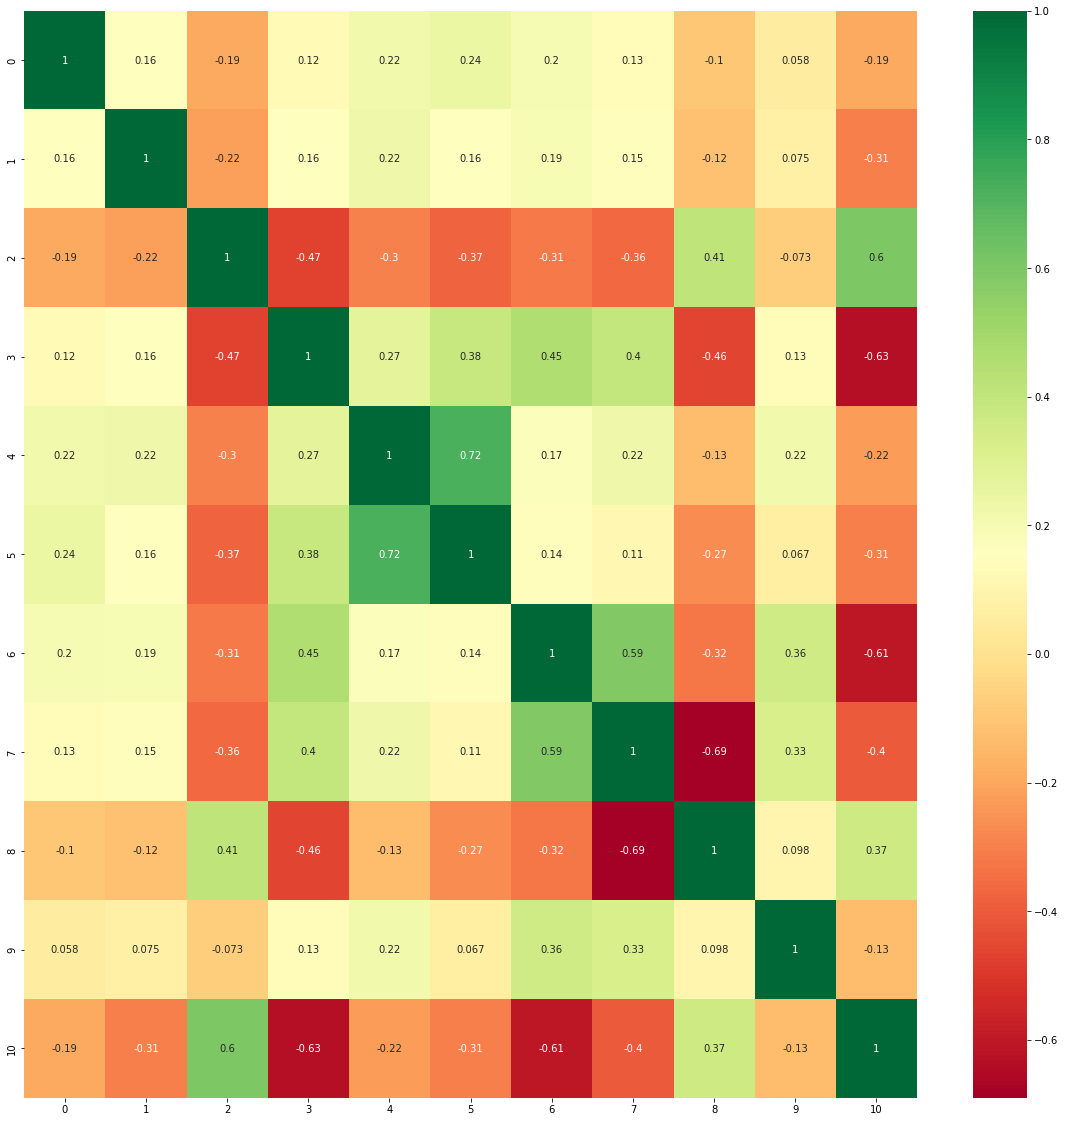

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

dataset contains object type attributes 


In [14]:
object_dtypes = df.select_dtypes(include = 'object')
object_dtypes

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,44,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,38,6000.0,NaN,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,31,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,32,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,35,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [15]:
# Mapping
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [16]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', 42.0, 17.0, 34.0, 37.0, 32.0, 33.0, 44.0, 46.0,
       28.0, 35.0, 23.0, 22.0, 36.0, 24.0, 39.0, 29.0, 19.0, 25.0, 41.0,
       30.0, 26.0, 31.0, 27.0, 40.0, 38.0, 15.0, 21.0, 43.0, 20.0, 47.0,
       9.0, 48.0, 52.0, 49.0, 45.0, 50.0, 53.0, 51.0, 54.0], dtype=object)

In [17]:
df['wc'].unique()

array([7800.0, 6000.0, 7500.0, 6700.0, 7300.0, nan, 6900.0, 9600.0,
       12100.0, 4500.0, 12200.0, 11000.0, 3800.0, 11400.0, 5300.0, 9200.0,
       6200.0, 8300.0, 8400.0, 10300.0, 9800.0, 9100.0, 7900.0, 6400.0,
       8600.0, 18900.0, 21600.0, 4300.0, 8500.0, 11300.0, 7200.0, 7700.0,
       14600.0, 6300.0, 7100.0, 11800.0, 9400.0, 5500.0, 5800.0, 13200.0,
       12500.0, 5600.0, 7000.0, 11900.0, 10400.0, 10700.0, 12700.0,
       '6800', '6500', '13600', '10200', '11400', '9000', '9800', '10300',
       '5600', '14900', '5500', '8200', '15200', '5000', '16300', '12400',
       '13200', '\t8400', '9200', '10500', '4200', '6700', '14600',
       '4700', '7900', '10900', '9400', '6000', '8100', '9500', '2200',
       '9600', '12800', '11200', '8600', '19100', '5800', '\t?', '12300',
       '7500', '16700', '2600', '4300', '26400', '10700', '10400', '6900',
       8800.0, 7400.0, 4900.0, 10500.0, 8000.0, 12000.0, 15700.0, 9500.0,
       4100.0, 5700.0, 5000.0, 4200.0, 11500.0, 10200.0,

In [18]:
df['rc'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5.0, 4.0, 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6.0, 2.1, 5.6,
       2.3, '5.2', '4.4', '4.2', '4.7', '3.9', '4.3', '3.6', '4.5', '2.9',
       '2.7', '8.0', '3.8', '4.1', '3.3', '3.0', '3', '2.4', '4.8', '\t?',
       '3.2', '5.4', '3.1', '4.9', '4.6', '3.4', '3.7', '2.8', '3.5', 3.3,
       6.1, 6.2, 6.3, 5.1, 5.8, 5.5, 5.3, 5.4, 4.8, 6.4, 5.7, 5.9, 6.5],
      dtype=object)

filling unknown values correctly

In [19]:
df['wc']=df['wc'].replace(["\t6200","\t8400","\t?"],[6200,8400, np.nan])
df['pcv']=df['pcv'].replace(["\t43","\t?"],[43,np.nan])
df['rc']=df['rc'].replace(["\t?"],[np.nan])

In [20]:
df['wc'].unique()

array([7800.0, 6000.0, 7500.0, 6700.0, 7300.0, nan, 6900.0, 9600.0,
       12100.0, 4500.0, 12200.0, 11000.0, 3800.0, 11400.0, 5300.0, 9200.0,
       6200.0, 8300.0, 8400.0, 10300.0, 9800.0, 9100.0, 7900.0, 6400.0,
       8600.0, 18900.0, 21600.0, 4300.0, 8500.0, 11300.0, 7200.0, 7700.0,
       14600.0, 6300.0, 7100.0, 11800.0, 9400.0, 5500.0, 5800.0, 13200.0,
       12500.0, 5600.0, 7000.0, 11900.0, 10400.0, 10700.0, 12700.0,
       '6800', '6500', '13600', '10200', '11400', '9000', '9800', '10300',
       '5600', '14900', '5500', '8200', '15200', '5000', '16300', '12400',
       '13200', '9200', '10500', '4200', '6700', '14600', '4700', '7900',
       '10900', '9400', '6000', '8100', '9500', '2200', '9600', '12800',
       '11200', '8600', '19100', '5800', '12300', '7500', '16700', '2600',
       '4300', '26400', '10700', '10400', '6900', 8800.0, 7400.0, 4900.0,
       10500.0, 8000.0, 12000.0, 15700.0, 9500.0, 4100.0, 5700.0, 5000.0,
       4200.0, 11500.0, 10200.0, 5400.0, 6800.0, 

In [21]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', 42.0, 17.0, 34.0, 37.0, 32.0, 33.0, 44.0, 46.0, 28.0,
       35.0, 23.0, 22.0, 36.0, 24.0, 39.0, 29.0, 19.0, 25.0, 41.0, 30.0,
       26.0, 31.0, 27.0, 40.0, 38.0, 15.0, 21.0, 43.0, 20.0, 47.0, 9.0,
       48.0, 52.0, 49.0, 45.0, 50.0, 53.0, 51.0, 54.0], dtype=object)

In [22]:
df['rc'].unique()

array([5.2, nan, 3.9, 4.6, 4.4, 5.0, 4.0, 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6.0, 2.1, 5.6,
       2.3, '5.2', '4.4', '4.2', '4.7', '3.9', '4.3', '3.6', '4.5', '2.9',
       '2.7', '8.0', '3.8', '4.1', '3.3', '3.0', '3', '2.4', '4.8', '3.2',
       '5.4', '3.1', '4.9', '4.6', '3.4', '3.7', '2.8', '3.5', 3.3, 6.1,
       6.2, 6.3, 5.1, 5.8, 5.5, 5.3, 5.4, 4.8, 6.4, 5.7, 5.9, 6.5],
      dtype=object)

Filling Missing values

In [23]:
df = df.fillna(method='ffill')
df = df.fillna(method='backfill')

In [24]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  --------------  --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object
 16  wc              400 non-null    object
 17  rc              400 non-null    

In [25]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

changing object type to numeric

In [26]:
df['pcv']=df['pcv'].astype(int)
df['wc']=df['wc'].astype(int)
df['rc']=df['rc'].astype(float)

In [27]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0)
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [28]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  --------------  --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    float64
 6   pc              400 non-null    float64
 7   pcc             400 non-null    float64
 8   ba              400 non-null    float64
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64
 16  wc              400 non-null    int64
 17  rc              400 non-null    fl

In [29]:
df['classification'].value_counts()

1.0    250
0.0    150
Name: classification, dtype: int64

In [30]:
target_true_count = len(df.loc[df['classification'] == 1])
target_false_count = len(df.loc[df['classification'] == 0])
target_true_count, target_false_count

(250, 150)

In [31]:
# plotting graph for output classes counts
# sns.countplot(x = 'classification',data = df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>,
        <AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>],
       [<AxesSubplot:title={'center':'rbc'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'bgr'}>],
       [<AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>],
       [<AxesSubplot:title={'center':'pcv'}>,
        <AxesSubplot:title={'center':'wc'}>,
        <AxesSubplot:title={'center':'rc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>],
       [<AxesSubplot:title={'center':'appet'}>,
        <AxesSubplot:title={'center':'

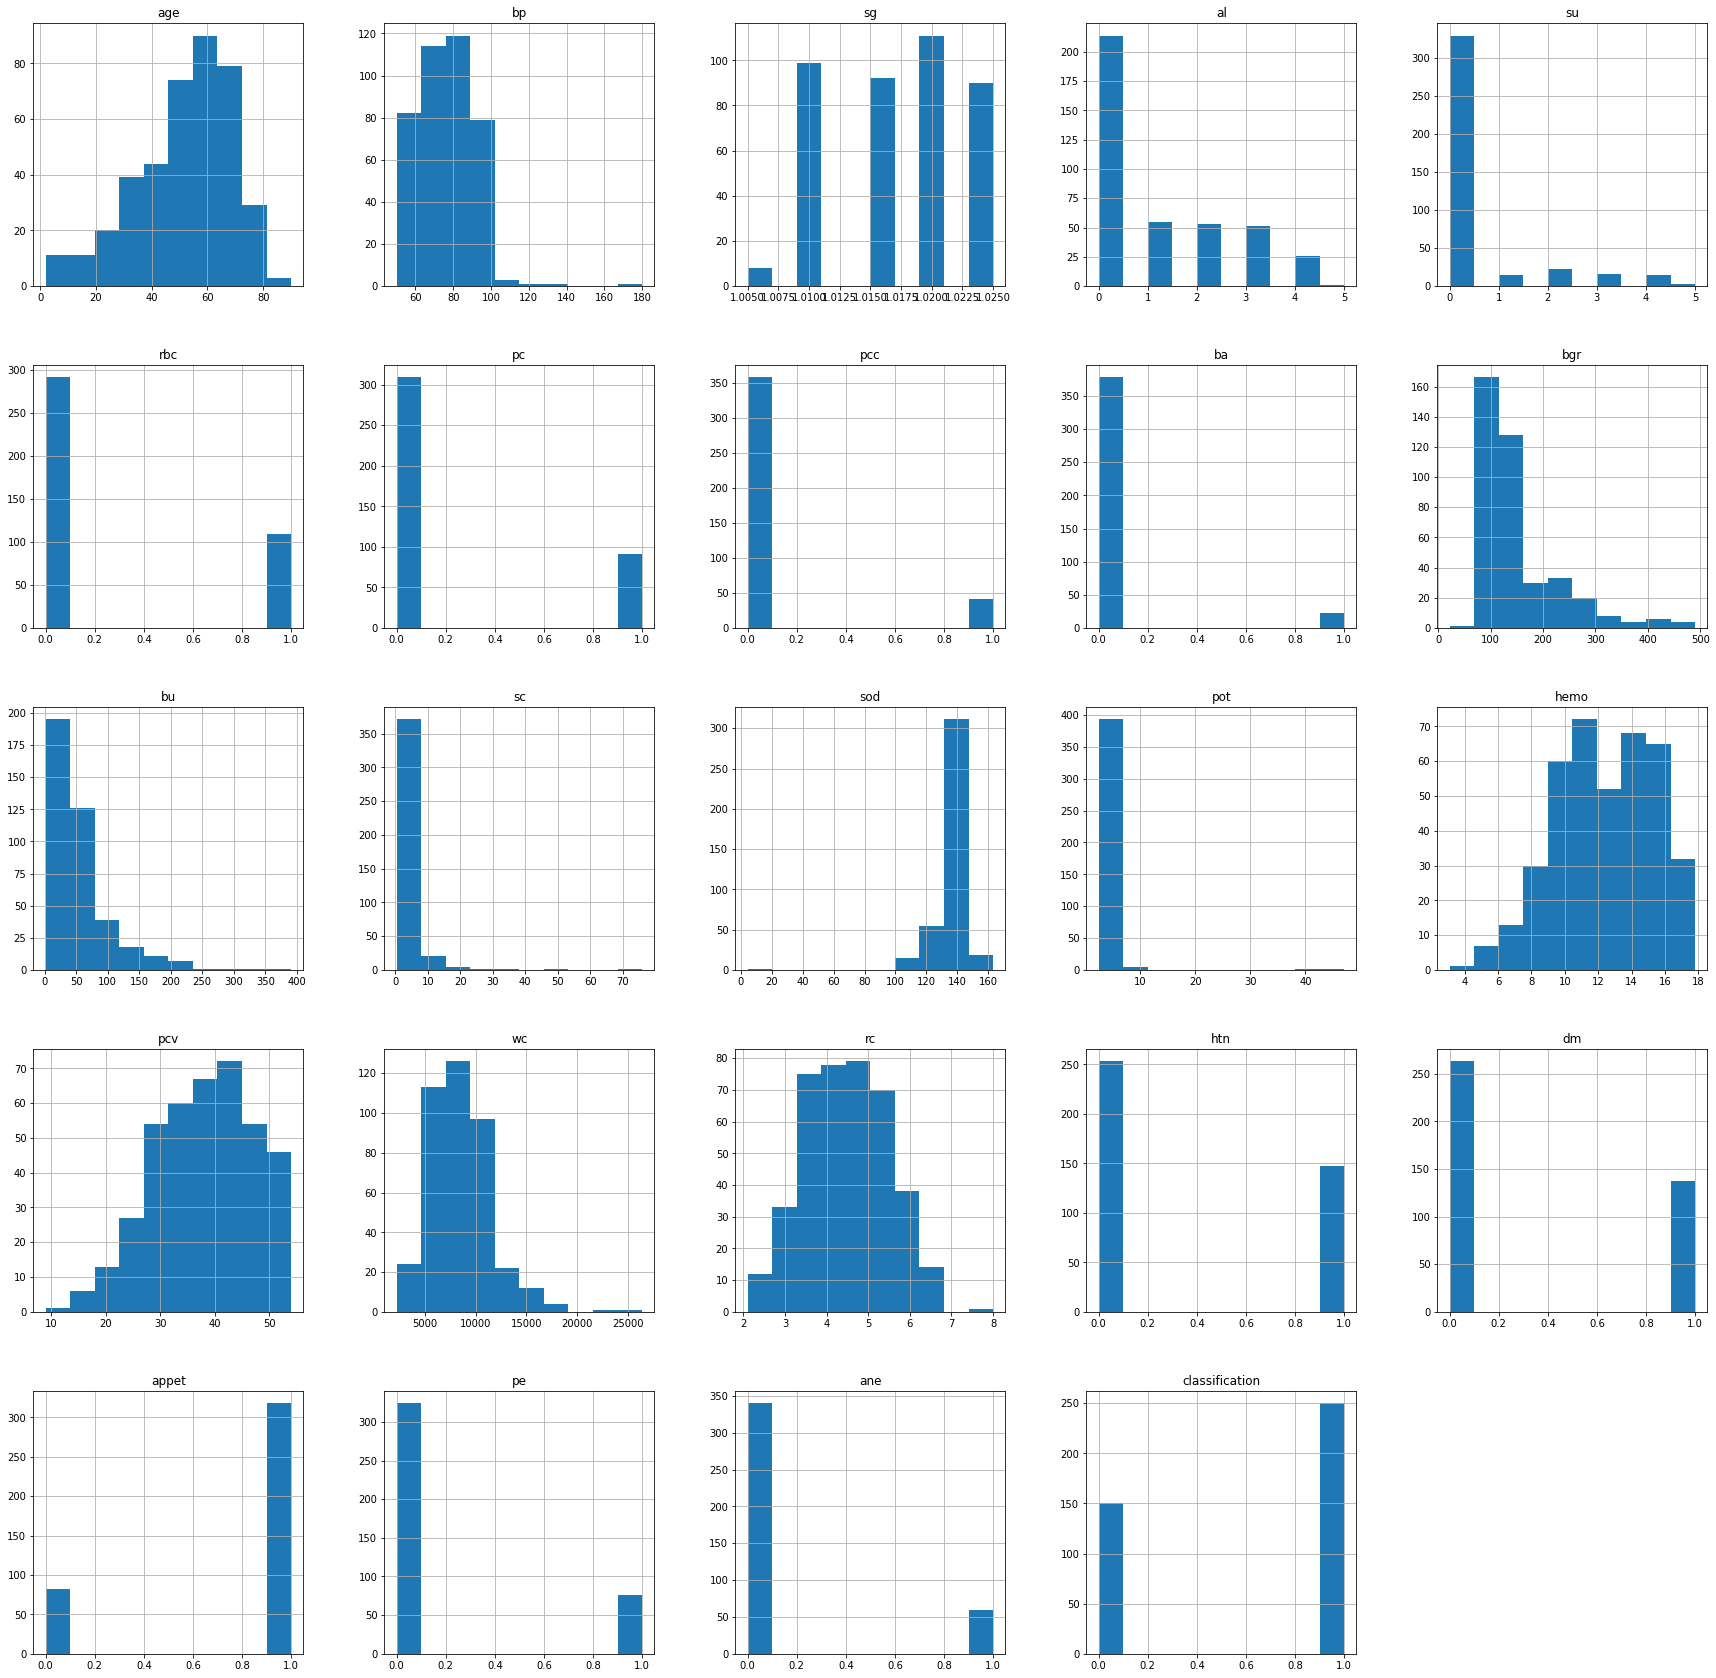

In [32]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))

(apply_list_of_funcs pid=141) 


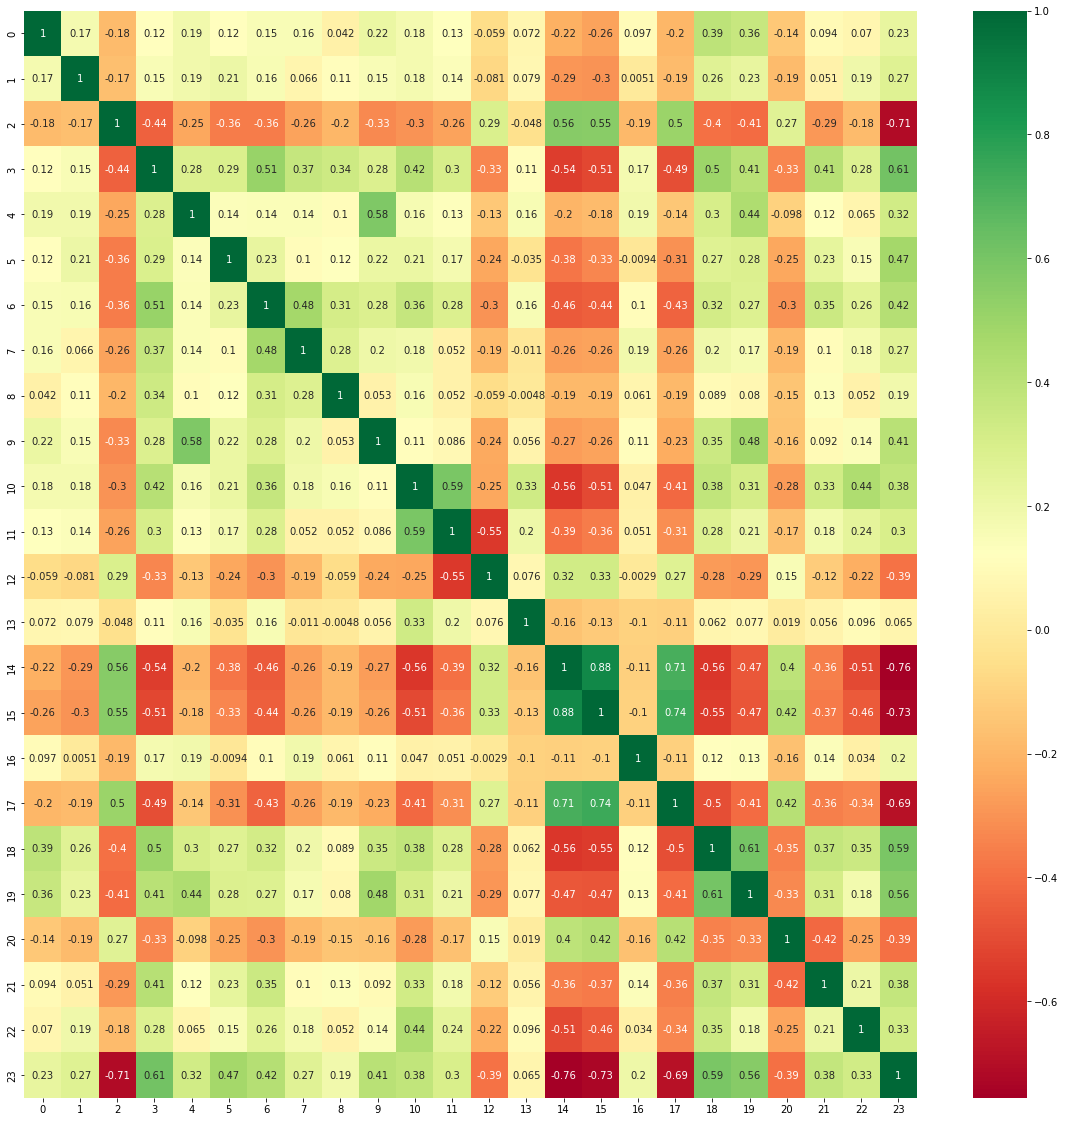

In [33]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [34]:
from sklearn.model_selection import train_test_split
feature_columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu','sc', 'sod', 
                   'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane']
predicted_class = ['classification']

In [35]:
X = df[feature_columns]
y = df[predicted_class]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.58 µs


In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)
%time

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 8.58 µs


In [37]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy Using OneAPI = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))
%time

Accuracy Using OneAPI = 1.000
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


In [39]:
import joblib
joblib.dump(model, "./rf_kidney_OneAPI.joblib")
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


In [40]:
from sklearnex import unpatch_sklearn
unpatch_sklearn()